# OCCUPANCY DETECTION USING CLASSIFICATION METHODS

To predict room occupancy (Yes or No, binary classification) from a set of experimental data making use of the feature predictors  such as Temperature,Humidity,Light and CO2. 

In the experiment, ground-truth occupancy was obtained from time stamped pictures that were taken every minute. More information regrading the dataset at :
https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+

Two data sets are considered, for training and testing. The variables in the dataset are :
1. date time year-month-day hour:minute:second 
2. Temperature, in Celsius 
3. Relative Humidity, as % 
4. Light, in Lux 
5. CO2, in ppm 
6. Humidity Ratio, Derived quantity from temperature and relative humidity, in kgwater-vapor/kg-air 
7. Occupancy, 0 or 1, 0 for not occupied, 1 for occupied status

This analysis is done in Python 3

Lets begin by importing the required libraries and the datasets

In [110]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
plt.style.use('ggplot')
%matplotlib inline
# Importing the dataset
training_set = pd.read_csv('datatraining.txt')
test_set = pd.read_csv('datatest.txt')

In [111]:
training_set.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [112]:
training_set.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,20.619084,25.731507,119.519375,606.546243,0.003863,0.212330
std,1.016916,5.531211,194.755805,314.320877,0.000852,0.408982
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,19.700000,20.200000,0.000000,439.000000,0.003078,0.000000
50%,20.390000,26.222500,0.000000,453.500000,0.003801,0.000000
75%,21.390000,30.533333,256.375000,638.833333,0.004352,0.000000
max,23.180000,39.117500,1546.333333,2028.500000,0.006476,1.000000


The training set data has 8143 rows and 7 columns. Occupancy is the Dependent Variable i.e y varaible. The other features except date forms the set of Independent Variables.

Also , there are no NA's and NaN's present.

## Data Preprocessing

In [113]:
#Splitting training set
X_train = training_set.iloc[:,1:6].values
y_train = training_set.iloc[:,6].values
#Splitting test set
X_test = test_set.iloc[:,1:6].values
y_test = test_set.iloc[:,6].values

Now visualize a pairplot of the training set data.

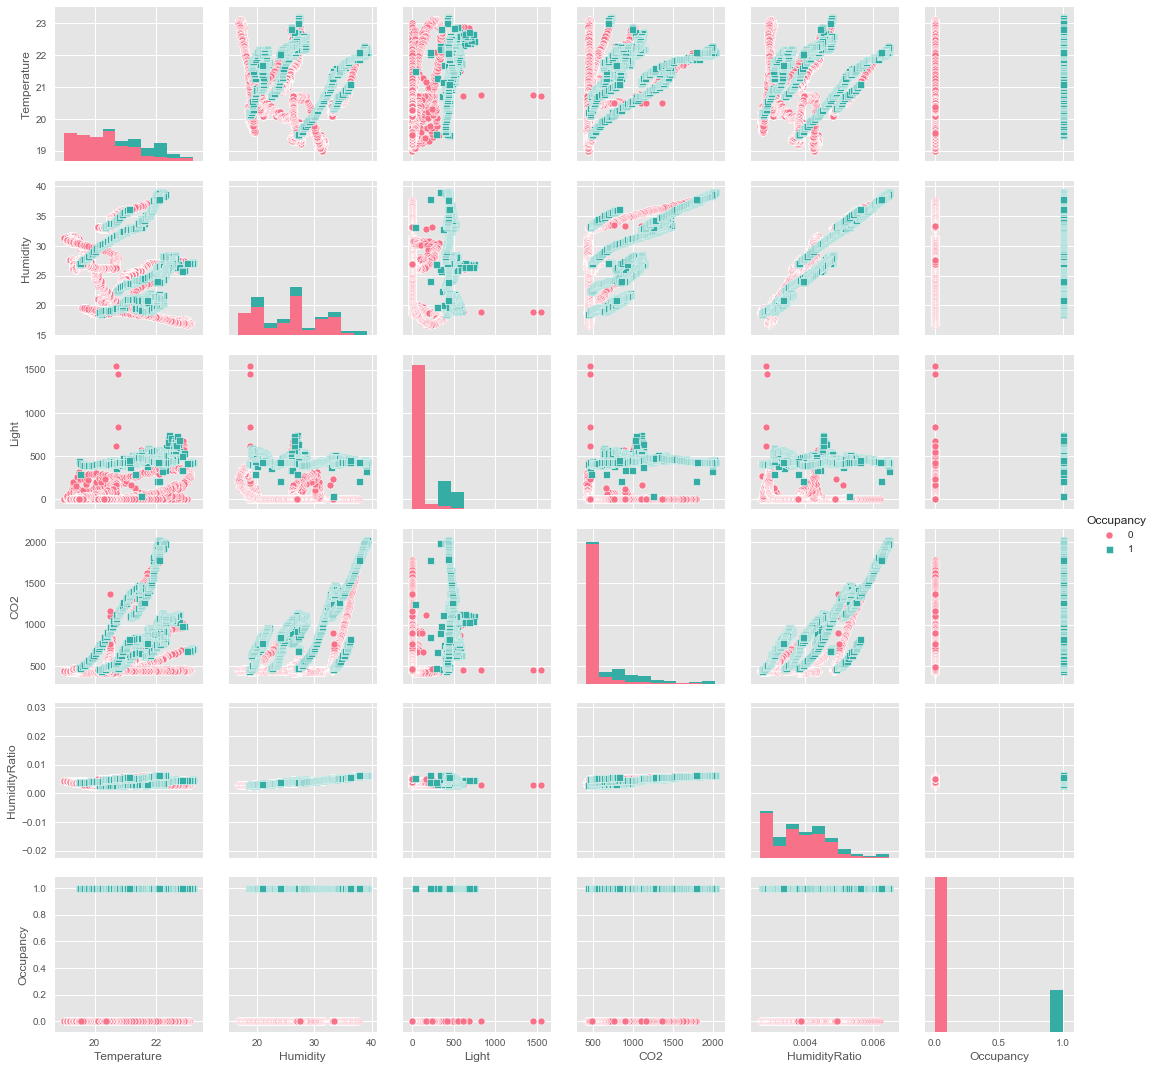

In [114]:
sb.pairplot(training_set, hue='Occupancy',palette="husl",markers=["o", "s"])

There are some Outliers in the Light variable. Lets remove them.

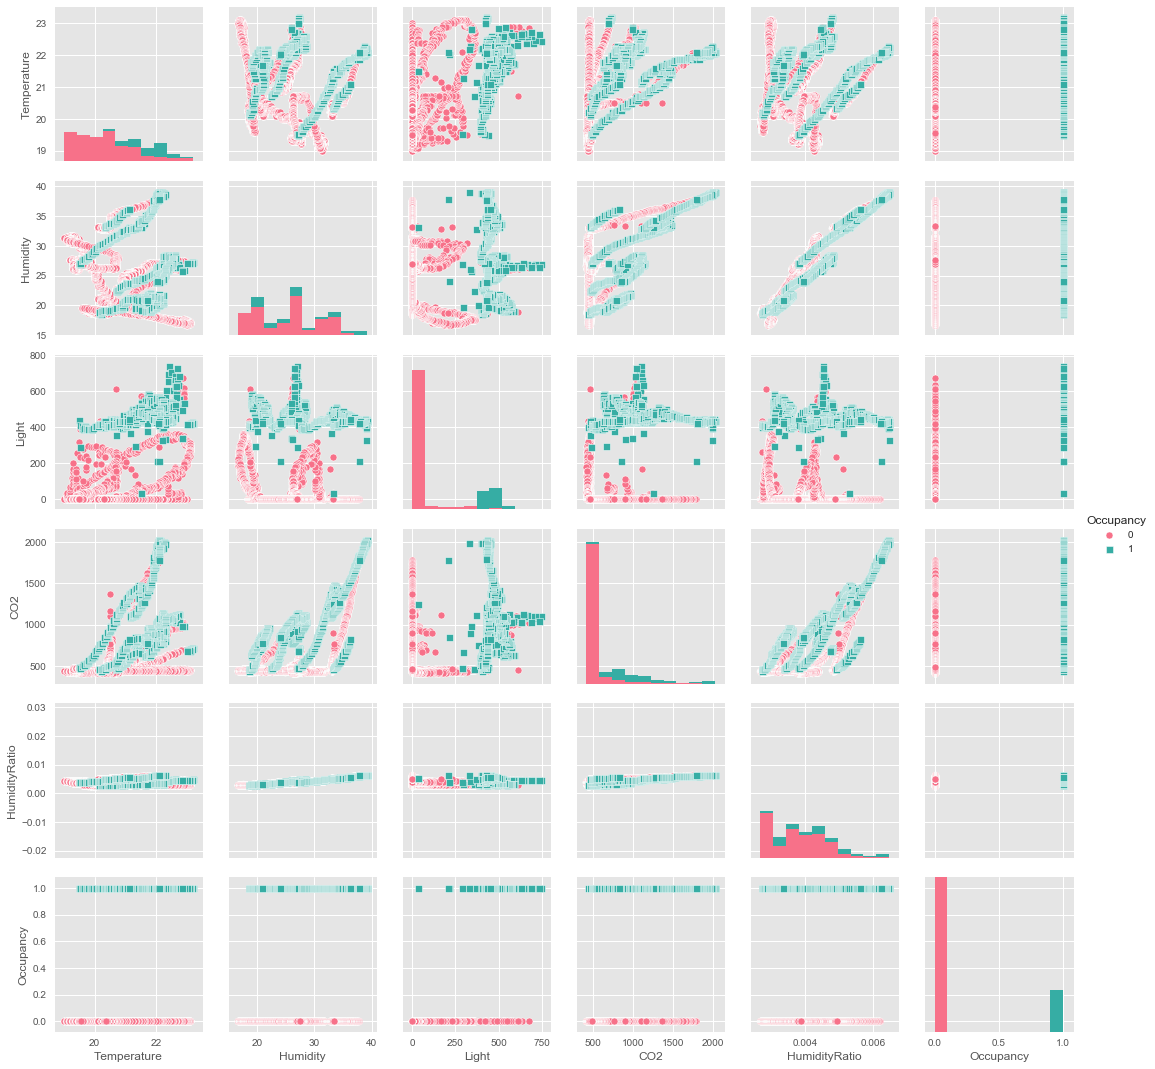

In [115]:
training_set = training_set.loc[(training_set['Light'] <=750)]
sb.pairplot(training_set, hue='Occupancy',palette="husl",markers=["o", "s"])

Now proceed to feature scaling

In [116]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Building a Classification model

In [118]:
# Fit a Logistic Regression for classification
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [119]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Printing the confusion matrix
from sklearn.metrics import confusion_matrix
cm_logit = confusion_matrix(y_test, y_pred)
cm_logit

array([[1639,   54],
       [   7,  965]])

From the confusion matrix, evaluation parameters such as Accuracy, Precision, Recall and F1 Score are to be evaluated. Before that, lets fit other classification methods to the same data.

In [120]:
# Fitting KNN CLASSIFIER to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test, y_pred)
cm_knn

array([[1671,   22],
       [ 192,  780]])

In [121]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(y_test, y_pred)
cm_svm

array([[1639,   54],
       [   3,  969]])

In [122]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_KSVM = confusion_matrix(y_test, y_pred)
cm_KSVM

array([[1616,   77],
       [   3,  969]])

In [123]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_NB = confusion_matrix(y_test, y_pred)
cm_NB

array([[1638,   55],
       [   5,  967]])

In [124]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_dtree = confusion_matrix(y_test, y_pred)
cm_dtree

array([[1644,   49],
       [ 267,  705]])

In [125]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 300, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_RF = confusion_matrix(y_test, y_pred)
cm_RF

array([[1641,   52],
       [  85,  887]])

Create a list of Confusion Matrices and compute model evaluation metrics.

In [126]:
cmlist = [cm_logit,cm_knn,cm_svm,cm_KSVM,cm_NB,cm_dtree,cm_RF]

In [127]:
Accuracy = []
Precision = []
Recall =[]
F1Score =[]

In [128]:
for i in range(7):
    temp = cmlist[i] 
    Accuracy.append((temp[0,0]+temp[1,1])/2665)
    Precision.append(temp[1,1]/(temp[1,1]+temp[0,1]))
    Recall.append(temp[1,1]/(temp[1,1]+temp[1,0]))
    F1Score.append(2*Precision[i]*Recall[i]/(Precision[i]+Recall[i]))

In [129]:
Algorithm = ['Logistic Regression','KNN ','SVM (Linear)','SVM(Kernel)','Naive Bayes','Decision Tree', 'Random Forests']

In [130]:
df = pd.DataFrame.from_items([('Algorithm',Algorithm), ('Accuracy' , Accuracy), ('Precision' ,Precision), 
                              ('Recall' , Recall), ('F1 Score', F1Score)])
df

,Algorithm,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.977111,0.947007,0.992798,0.969362
1,KNN,0.919700,0.972569,0.802469,0.879369
2,SVM (Linear),0.978612,0.947214,0.996914,0.971429
3,SVM(Kernel),0.969981,0.926386,0.996914,0.960357
4,Naive Bayes,0.977486,0.946184,0.994856,0.969910
5,Decision Tree,0.881426,0.935013,0.725309,0.816918
6,Random Forests,0.948593,0.944622,0.912551,0.928310


## Conclusion
1. From above, we observe that Logistic Regression and SVM with a linear kernel seems to be good performers for this   problem, as they give out the metric values most close to 1.
2. As for this dataset, linear classifiers tend to perform well as compared to the other nonlinear classifiers as the problem being a binary classificaton with dependent variable having only two classes, 0 and 1.